In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [16]:
mean =[0,0]
cov = [[1,0.8],[0.8,1]]
np.random.seed(20)
data = np.random.multivariate_normal(mean, cov, size=(500))
print(data.shape)


(500, 2)


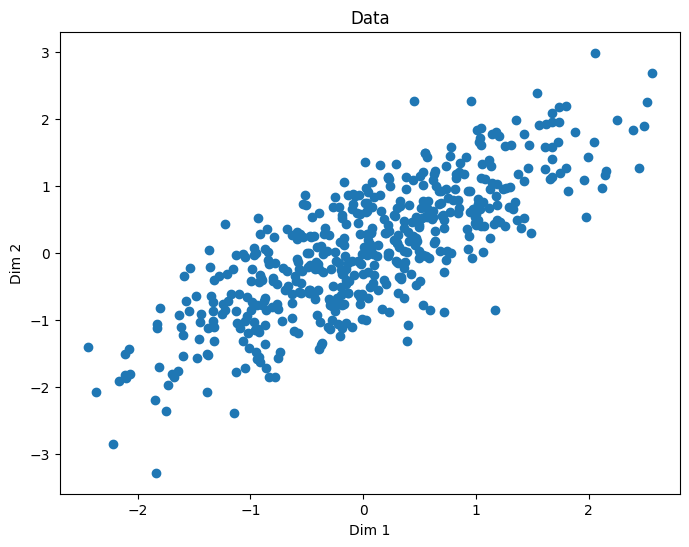

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1])
plt.title("Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [24]:
mean_data = np.mean(data, axis = 0)
center_data = data - mean_data

In [25]:
cov_mat = np.cov(center_data.T)
print(cov_mat.shape)
print(cov_mat)

(2, 2)
[[0.93252276 0.75071029]
 [0.75071029 0.96387632]]


In [26]:
eig_val, eig_vec = np.linalg.eig(cov_mat)
print(eig_val)

[0.19732558 1.6990735 ]


In [27]:
sorted_id = np.argsort(eig_val)[::-1]
sort_eig = eig_val[sorted_id]
sort_vec = eig_vec[:, sorted_id]
print(sort_eig)

[1.6990735  0.19732558]


In [30]:
pca_data = np.dot(center_data,sort_vec)
print(pca_data)

[[ 1.24753636e+00  8.04327556e-02]
 [ 5.53247854e-01 -1.06240969e+00]
 [-1.39534103e+00  2.15559846e-01]
 [ 1.32757834e+00 -4.43943740e-01]
 [ 7.35689390e-01  1.69254697e-01]
 [ 4.98896806e-01 -2.35653516e-01]
 [-9.95962968e-01 -4.07326936e-01]
 [-1.65503822e+00  7.24242882e-02]
 [-3.96079494e-03  6.80873446e-01]
 [ 1.47088457e+00  1.76909661e-01]
 [-1.48709934e-01 -1.44829875e+00]
 [ 1.55915922e+00  5.92156891e-01]
 [-2.63199974e-01 -8.10925203e-02]
 [-9.08712216e-02  6.74846950e-01]
 [ 2.45063266e-01 -9.42049444e-01]
 [-1.12014364e+00 -5.25894362e-01]
 [ 1.30453488e+00  9.14667316e-01]
 [-1.18410356e+00 -7.53942697e-01]
 [ 7.76989733e-01 -7.05789241e-01]
 [ 5.10153104e-01 -5.23161738e-01]
 [-3.92958208e-01  1.19257775e-01]
 [-7.52600513e-01  6.62813902e-01]
 [ 9.27918812e-01  2.54806883e-01]
 [ 6.43948729e-01  5.93787728e-01]
 [ 1.67227059e+00  6.01843354e-01]
 [ 7.37253760e-01 -1.22198777e+00]
 [-6.82177991e-01 -2.66373619e-02]
 [ 1.20558267e+00  6.54820152e-01]
 [-2.39060847e-01  6

In [29]:
print(pca_data.shape)

(500, 2)


In [12]:
print(sort_vec)

[[-0.69968634 -0.71445015]
 [-0.71445015  0.69968634]]


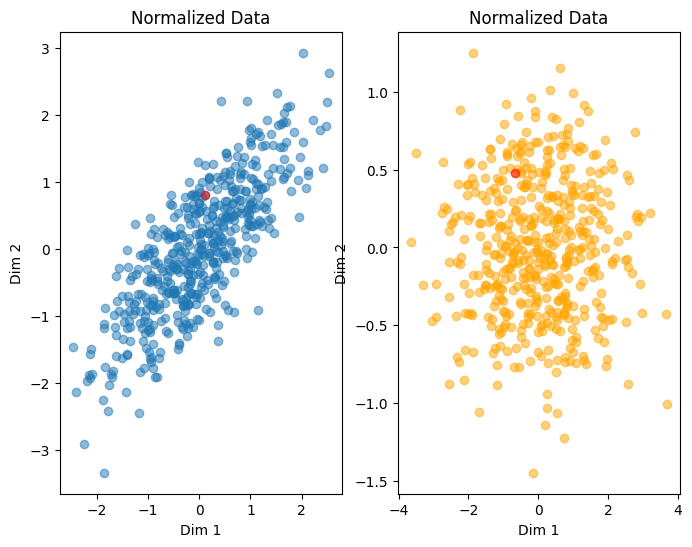

In [13]:
point_index = 50
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.scatter(center_data[:,0],center_data[:,1], alpha = 0.5)
plt.title("Normalized Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.scatter(center_data[point_index,0],center_data[point_index,1], alpha = 0.5, color = "red")
# for length, vector in zip(pca.explained_variance_, principal_components):
#     v = vector*2*np.sqrt(length)
#     plt.quiver(mean_x[0], mean_x[1], v[0], v[1], angles = "xy", scales = 1, color = "red", width = 0.005)
# plt.show()

plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1], alpha = 0.5, color = "orange")
plt.title("Normalized Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.scatter(pca_data[point_index,0],pca_data[point_index,1], alpha = 0.5, color = "red")
plt.show()

In [14]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data)
print(data_pca.shape)

(500, 2)


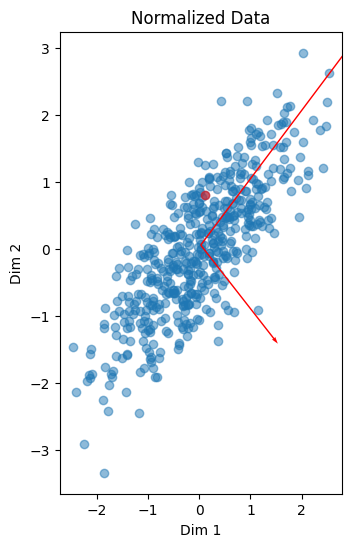

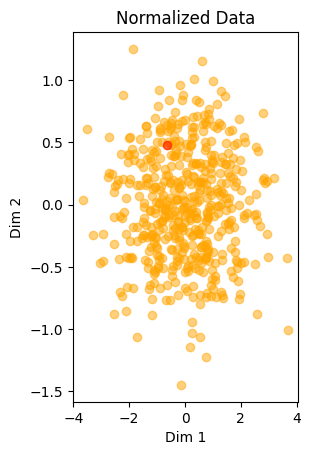

In [15]:
point_index = 50
principal_components = pca.components_
mean_x = pca.mean_
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.scatter(center_data[:,0],center_data[:,1], alpha = 0.5)
plt.title("Normalized Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.scatter(center_data[point_index,0],center_data[point_index,1], alpha = 0.5, color = "red")
for length, vector in zip(pca.explained_variance_, principal_components):
    v = vector*1*np.sqrt(length)
    plt.quiver(mean_x[0], mean_x[1], v[0], v[1], angles = "xy", scale = 1, color = "red", width = 0.005)
plt.show()

plt.subplot(1,2,2)
plt.scatter(pca_data[:,0],pca_data[:,1], alpha = 0.5, color = "orange")
plt.title("Normalized Data")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.scatter(pca_data[point_index,0],pca_data[point_index,1], alpha = 0.5, color = "red")
plt.show()